# The role of drag on the global circulation an Aquaplanet
## Introduction
Until today it remains largely unknown what the role of drag (the extraction of momentum at the surface due to friction) is in the global circulation.

In this BSc-thesis project, you work with output of the ICON climate model, the new climate model of the Max Planck Institute for Meteorology (http://www.mpimet.mpg.de/en/science/models/icon/). The model has been run as an Aquaplanet in a setting with a diurnal cycle, but no seasons. The forcings of the model are symmetric over the equator, which means that the intertropical convergence zone (ITCZ) is centered exactly at the equator and the storm tracks on both hemispheres are equally far from the equator.

The drag at the surface is calculated following:

$$ \boldsymbol{\tau} = -C_D \left| \boldsymbol{u} \right| \boldsymbol{u},$$

which can be decomposed in the two vector components:

$$ \tau_u = -C_D \left| \boldsymbol{u} \right| u,$$
$$ \tau_v = -C_D \left| \boldsymbol{u} \right| v.$$

Let us go through these variables: $\tau$ is the drag at the surface in units of m$^2$ s$^{-2}$, vector $\boldsymbol{u} = (u,v)$ is the wind vector at the lowest model level consisting of the zonal component $u$ and the meridional component $v$, both in m s$^{-1}$. The last variable is the drag coefficient $C_D$, which is the core of this project. The drag coefficient is a complex expression that under windy conditions can be approximated as:

$$C_D \approx \dfrac{\kappa^2}{\left( \ln \left( \dfrac{z}{z_{0m}} \right) \right)^2},$$

where $\kappa$ is the Von Karman constant with a value of 0.4, $z$ is the height at the first model level and $z_{0m}$ is the roughness length for momentum.

In this project, you are going to compare two simulations: one in which the roughness of water is prescribed as it is commonly done in weather and climate models, and one in which it is artificially enhanced with a factor of 100.

There are hypotheses that the position of the storm tracks, the locations of the strongest westerlies in the midlatitudes where most of the precipitation falls, is a function of the drag. It is your task to find out whether we observe this as well.

## Working plan
In this project, your goal is to understand the role of drag on the large-scale circulation better. This question can only be answered by answering a sequence of sub questions:

* What is difference in observed drag between the two simulations?
* What is the effect on the winds and on the climatology of wind?
* How do the global distribution of (geopotential) height, temperature, humidity and precipitation change?
* What is the explanation for the observed changes?

Answering all of these questions is, of course, unfeasible in the time you have for this project. Therefore, in the first week it is your task to explore the data, and search for differences that you consider important and that you find interesting. Based on those, you write your proposal and base the remainder of your thesis.


## The data
You work with a 3D NetCDF file that contains one year of 6-hourly fields of zonal wind $u$, meridional wind $v$, vertical wind $w$, height $zg$, temperature $T$, specific humidity $q$ and relative humidity $RH$. Each time step has the values at a lat/lon grid, with values at the 925, 850, 500 and 300 hPa pressure levels.

## Opening data with the help of Python
In order to be able to do our work with Python, it is necessary to load a number of packages. Their purpose has been addded as comments in the code.

In [1]:
from ipywidgets import interact # Package ipywidgets contains the features of the interactive notebooks.
import numpy as np   # Numpy is the fundamental package for scientific computing in Python.
import netCDF4 as nc # NetCDF has become the standard format for data storage in meteorology and climate sciences.
import matplotlib.pyplot as pl # Matplotlib is a scientific plotting package.
# The statement below enforces the plots to be put into this notebook, instead of in their own windows.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


First, we load the data set into an instance `nc_wind` of an object that can read a NetCDF file:

In [2]:
nc_wind = nc.Dataset("u_p_3d.nc", "r") # The dataset is loaded in read-only mode.
#nc_wind = nc.Dataset("u_p_3d_large2.nc", "r") # The dataset is loaded in read-only mode.

The `nc_wind` instance gives us access to the variables from the data file. Note that we add the data range  `[:]` after the variable retrieval, to make sure we end up with an array of data points:

In [3]:
lat  = nc_wind.variables["lat"] [:] # This is an array with the latitudes.
lon  = nc_wind.variables["lon"] [:] # This is an array with the longitudes.
lev  = nc_wind.variables["lev"] [:] # This is an array with the pressure levels.
time = nc_wind.variables["time"][:] # This is an array with the time variables.

In [4]:
ua = nc_wind.variables["ua"][-1,0,:,:]

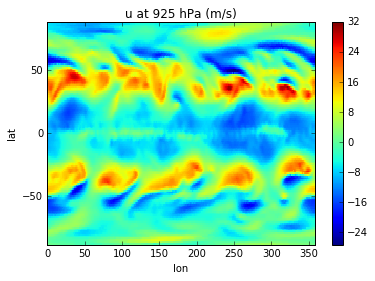

In [5]:
pl.pcolormesh(lon,lat,ua)
pl.colorbar()
pl.xlim(lon.min(), lon.max())
pl.ylim(lat.min(), lat.max())
pl.xlabel("lon")
pl.ylabel("lat")
pl.title("u at 925 hPa (m/s)");

In [6]:
def plot_u_on_p_surface(it=0, ip=0):
    ua = nc_wind.variables["ua"][it,ip,:,:]
    pl.pcolormesh(lon, lat, ua)
    pl.colorbar()
    pl.xlim(lon.min(), lon.max())
    pl.ylim(lat.min(), lat.max())
    pl.xlabel("lon")
    pl.ylabel("lat")
    pl.title("u at {0} hPa (m/s) on {1}".format(lev[ip] / 100., time[it]));
interact(plot_u_on_p_surface, it=(0, time.size-1), ip=(0,lev.size-1), __manual=True);

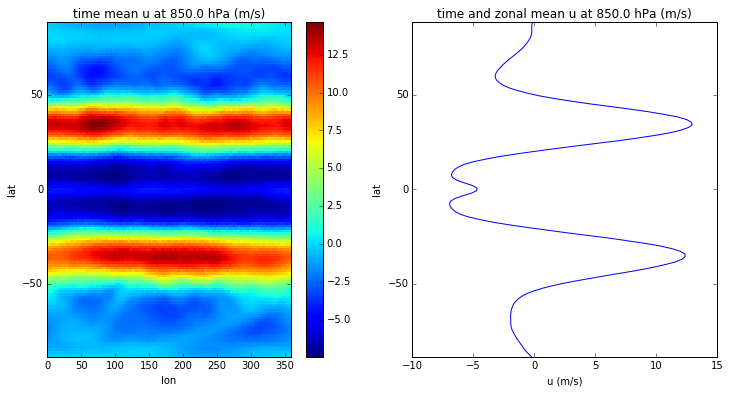

In [7]:
ua_time_mean = numpy.mean(nc_wind.variables["ua"][:,1,:,:], axis=0)
ua_time_zonal_mean = numpy.mean(ua_time_mean, axis=1)
pl.figure(figsize=(12,6))
pl.subplot(121)
pl.pcolormesh(lon, lat, ua_time_mean)
pl.colorbar()
pl.xlim(lon.min(), lon.max())
pl.ylim(lat.min(), lat.max())
pl.xlabel("lon")
pl.ylabel("lat")
pl.title("time mean u at {0} hPa (m/s)".format(lev[1] / 100.));
pl.subplot(122)
pl.plot(ua_time_zonal_mean, lat)
pl.ylim(lat.min(), lat.max())
pl.xlabel("u (m/s)")
pl.ylabel("lat")
pl.title("time and zonal mean u at {0} hPa (m/s)".format(lev[1] / 100.));

Latitude: 39.9218160676
Latitude: 39.9218160676
Mean wind at 40 N, 0 E, and 850 hPa = 10.3734989166 m/s
Max  wind at 40 N, 0 E, and 850 hPa = 30.1839351654 m/s


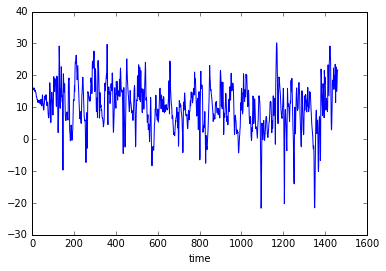

In [8]:
print("Latitude: {0}".format(lat[35]))        # Manually select the correct latitude
idx_lat40 = abs(lat-40).argmin()              # Argmin gives the index where the given array has the minimal value.
print("Latitude: {0}".format(lat[idx_lat40])) # Check here whether the outcome is correct.
ua_time_40_850 = nc_wind.variables["ua"][:,1,idx_lat40,0]
print("Mean wind at 40 N, 0 E, and 850 hPa = {0} m/s".format(ua_time_40_850.mean()))
print("Max  wind at 40 N, 0 E, and 850 hPa = {0} m/s".format(ua_time_40_850.max()))
pl.plot(ua_time_40_850);
pl.xlabel('time');

In [9]:
nc_wind.variables["ua"].shape

(1461, 4, 128, 256)